In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<class 'list'>
1


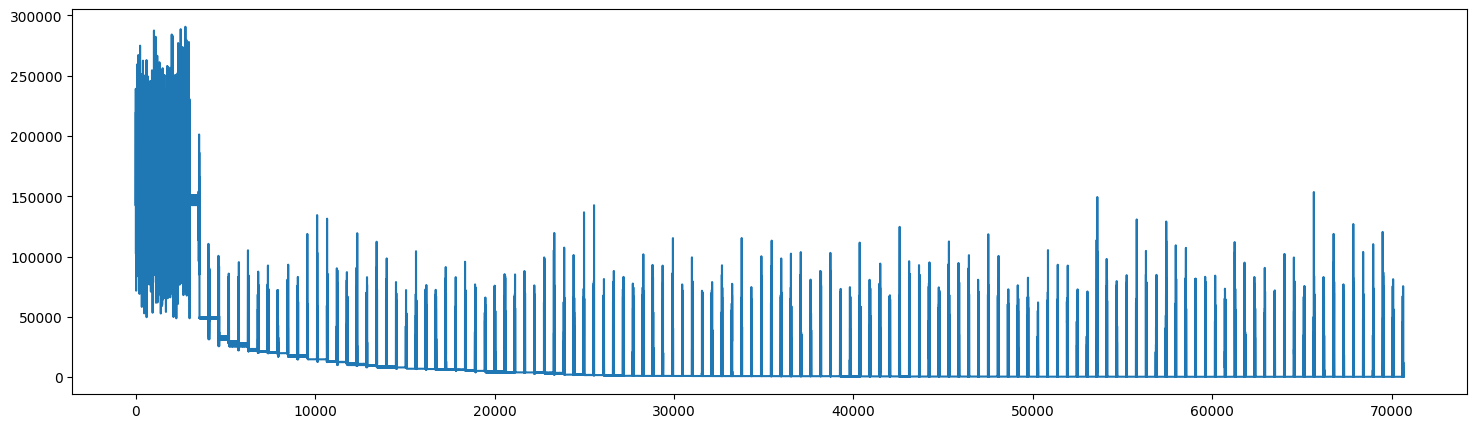

In [30]:
import sys
with open("test.txt") as f:
  line = f.readlines()
print(type(line))
print(len(line))
l = []
# print(line[0])
l = line[0].split(",")
ll=[]
for i in l:
  # print(i.strip())
  ll.append(int(i.strip()))


plt.figure(figsize=(18, 5))
# print(ll)
plt.plot(ll)
plt.savefig("./images/ga_loss1.png")

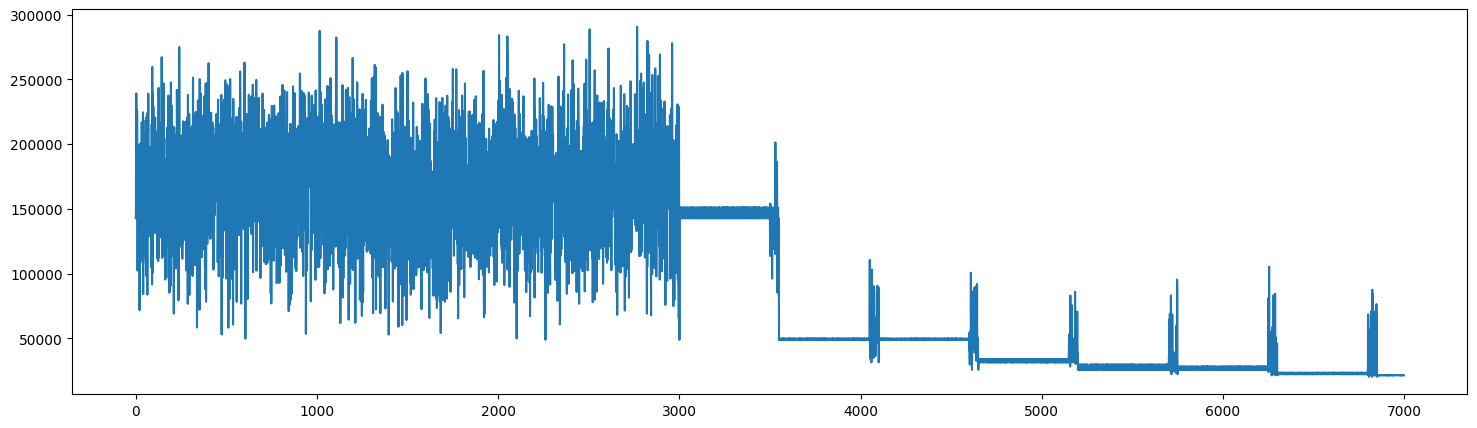

In [29]:
plt.figure(figsize=(18, 5))
plt.plot(ll[:7000])
plt.savefig("./images/ga_loss.png")

In [2]:
class multi_logistic_regression:
    """
    multiclassification logistic regression methods without normalization
    """
    def __init__(self, x, y, test_ratio, learning_rate, run_times):
        if test_ratio > 0:
            np.random.seed(3)
            self.x_train, self.x_test, self.y_train, self.y_test =\
                    train_test_split(x, y, test_size=test_ratio)
        else:
            self.x_train, self.x_test = x, x
            self.y_train, self.y_test =  y, y
        print("self.x_test: ", self.x_test.shape, "self.x_train: ", self.x_train.shape)
        print("self.y_train: ", self.y_train)
        print("self.y_test: ", self.y_test)
        self.n_class = max(self.y_train) + 1
        
        # init y
        self.y_train = self.one_hot(self.y_train)
        self.y_test = self.one_hot(self.y_test)
        print("self.y_test: ", self.y_test.shape, "self.y_train: ", self.y_train.shape)

        # init x
        self.x_test = self.add_bias(self.x_test)
        self.x_train = self.add_bias(self.x_train)
        print("self.x_test: ", self.x_test.shape, "self.x_train: ", self.x_train.shape)
        

        self.n_feas = self.x_train.shape[1]
        self.n_semples = self.x_train.shape[0]
        
        # init w
        np.random.seed(1)
        self.w = np.random.rand(self.n_feas, self.n_class)
        
        print("self.w: ", self.w, self.w.shape)
        
        self.alpha = learning_rate
        self.run_times = run_times


    def one_hot(self, s):
        res = np.eye(self.n_class)[s.reshape(-1)] 
        return res.reshape(list(s.shape)+[self.n_class])
    
    def add_bias(self, x):
        b = np.full((x.shape[0], 1), 1)
        res = np.concatenate((b, x), axis=1)
        return res
    
    def multi_lr(self, x, w):
        """
        softmax + linear regression
        """
        linear = np.dot(x, w)
        exp = np.exp(linear) 
        denominator = np.sum(exp, axis = 1)
        #print("denominator: ", denominator)
        denominator = denominator.reshape([exp.shape[0], 1])
        #print("exp: ", exp, exp.shape)
        res =  exp / denominator
        #print("multi_lr: ", res, res.shape)
        return res
    
    def update_w(self, w, x, y_pred, y_true, learning_ratio):
        delta = np.dot(x.T, (y_pred - y_true)) / len(x)
        return w - learning_ratio * delta
    
    def loss(self, y_pred, y_true):   
        res = np.mean(-y_true * np.log(y_pred)) 
        return res
    
    def run(self):
        n = self.run_times
        loss_trains, loss_tests = [], []
        while(n>0):
            y_pred_train = self.multi_lr(self.x_train, self.w)
            y_pred_test = self.multi_lr(self.x_test, self.w)
            
            loss_trains.append(self.loss(y_pred_train, self.y_train))
            loss_tests.append(self.loss(y_pred_test, self.y_test))
            print(self.w)
            print("--------------------------")
            self.w = self.update_w(self.w, self.x_train, y_pred_train, self.y_train, self.alpha)                     
            n -= 1

        print("loss_tests: ", loss_tests)
        print("loss_trains: ", loss_trains)
        plt.figure(figsize=(18, 5))
        plt.plot(loss_trains, label = "loss_trains")
        plt.plot(loss_tests, label = "loss_tests")
        plt.legend(loc="best")
        # plt.savefig("./images/multi_lr_loss_{}.png".format(self.alpha), bbox_inches="tight")

self.x_test:  (30, 4) self.x_train:  (120, 4)
self.y_train:  [0 0 2 1 0 0 1 0 2 1 2 1 0 0 2 1 0 1 2 1 0 0 2 1 1 0 2 0 2 1 0 0 2 1 0 0 1
 2 2 0 2 1 0 0 2 2 2 1 1 1 0 0 2 2 1 2 1 2 0 2 0 1 1 2 2 0 1 0 1 1 1 0 2 0
 2 1 2 1 2 1 0 2 1 2 1 0 1 2 0 1 0 0 0 1 2 0 0 2 0 1 2 1 2 2 1 1 2 1 0 1 1
 0 1 2 2 2 0 0 2 2]
self.y_test:  [0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1]
self.y_test:  (30, 3) self.y_train:  (120, 3)
self.x_test:  (30, 5) self.x_train:  (120, 5)
self.w:  [[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]
 [5.38816734e-01 4.19194514e-01 6.85219500e-01]
 [2.04452250e-01 8.78117436e-01 2.73875932e-02]] (5, 3)
[[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]
 [5.38816734e-01 4.19194514e-01 6.85219500e-01]
 [2.04452250e-01 8.78117436e-01 2.73875932e-02]]
--------------------------
[

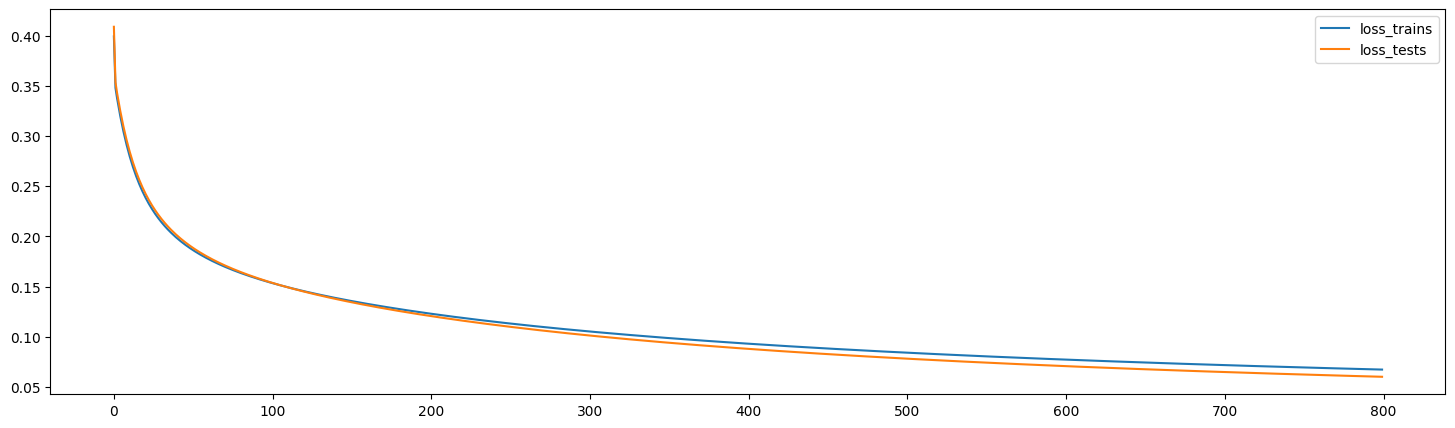

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names
mlr = multi_logistic_regression(x, y, test_ratio=0.2, learning_rate=0.05, run_times=800)
mlr.run()

PCA

In [4]:
meanim=np.mean(x,axis=0)
print("means: ", meanim)
devim=x-meanim 
[u, s, v] = np.linalg.svd(devim) 
print(u.shape, s.shape, v.shape)
print(u[:3])


means:  [5.84333333 3.05733333 3.758      1.19933333]
(150, 150) (4,) (4, 4)
[[-1.06937444e-01 -5.31164840e-02  8.17734010e-03  1.20053534e-03
  -9.39827803e-02 -6.73473583e-02 -1.32536467e-01 -8.62917820e-02
  -1.32835688e-01 -8.25855057e-02 -5.54498693e-02 -1.04395686e-01
  -9.13180170e-02 -1.46274438e-01 -2.98970444e-02 -5.58929397e-02
  -7.43994754e-02 -8.58331185e-02 -2.98351848e-02 -9.29620427e-02
  -4.30318572e-02 -9.47458475e-02 -1.40768764e-01 -8.41116402e-02
  -9.91065980e-02 -7.26728146e-02 -9.40243312e-02 -6.93888334e-02
  -6.81878781e-02 -1.08401183e-01 -9.55037323e-02 -5.60534943e-02
  -8.24249512e-02 -6.20993546e-02 -8.73332950e-02 -8.56529008e-02
  -4.31144923e-02 -9.91684576e-02 -1.37562702e-01 -7.63583154e-02
  -9.75296143e-02 -1.11629133e-01 -1.43490671e-01 -1.06483894e-01
  -9.06577149e-02 -1.00813596e-01 -8.64512242e-02 -1.21860708e-01
  -6.53833358e-02 -8.50908267e-02  1.17748984e-01  4.98743368e-02
   1.09557771e-01 -1.21705695e-02  7.34267707e-02  1.69158748e-03

In [5]:
xx = np.dot(x, v.T[:2].T)
print(xx)

[[ 0.42295015 -3.88764963]
 [ 0.67896722 -3.50566441]
 [ 0.41716916 -3.57500111]
 [ 0.56309535 -3.61311488]
 [ 0.32115261 -3.95221352]
 [ 0.50643701 -4.44838882]
 [ 0.33946445 -3.80434454]
 [ 0.51067335 -3.86597231]
 [ 0.5639328  -3.39038701]
 [ 0.63996261 -3.60649932]
 [ 0.45825136 -4.11882975]
 [ 0.49659902 -3.90885889]
 [ 0.61127984 -3.46523984]
 [ 0.25597759 -3.24360534]
 [ 0.23122041 -4.19231394]
 [ 0.17015263 -4.71924413]
 [ 0.27362507 -4.20922449]
 [ 0.45449887 -3.91962194]
 [ 0.64896315 -4.36875712]
 [ 0.31572522 -4.19846145]
 [ 0.77163396 -4.01936349]
 [ 0.41293282 -4.15741762]
 [-0.05621396 -3.67924018]
 [ 0.82352302 -4.01690752]
 [ 0.67120797 -4.08823214]
 [ 0.83151185 -3.63369882]
 [ 0.63197378 -3.98970802]
 [ 0.51729179 -3.95589296]
 [ 0.52474769 -3.82308573]
 [ 0.59177811 -3.75437436]
 [ 0.69357565 -3.68981046]
 [ 0.71832543 -3.96372594]
 [ 0.09178981 -4.36201751]
 [ 0.10789265 -4.43257164]
 [ 0.67151132 -3.63847163]
 [ 0.46738215 -3.54056678]
 [ 0.5093018  -3.86166755]
 

self.x_test:  (30, 2) self.x_train:  (120, 2)
self.y_train:  [0 0 2 1 0 0 1 0 2 1 2 1 0 0 2 1 0 1 2 1 0 0 2 1 1 0 2 0 2 1 0 0 2 1 0 0 1
 2 2 0 2 1 0 0 2 2 2 1 1 1 0 0 2 2 1 2 1 2 0 2 0 1 1 2 2 0 1 0 1 1 1 0 2 0
 2 1 2 1 2 1 0 2 1 2 1 0 1 2 0 1 0 0 0 1 2 0 0 2 0 1 2 1 2 2 1 1 2 1 0 1 1
 0 1 2 2 2 0 0 2 2]
self.y_test:  [0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1]
self.y_test:  (30, 3) self.y_train:  (120, 3)
self.x_test:  (30, 3) self.x_train:  (120, 3)
self.w:  [[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]] (3, 3)
[[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]]
--------------------------
[[0.40084352 0.72416267 0.01245468]
 [0.21461746 0.1719975  0.1548121 ]
 [0.30413663 0.31812283 0.30632895]]
--------------------------
[[0.39909117 0.71977196 0.01859775]
 [0.17217022 0.170657

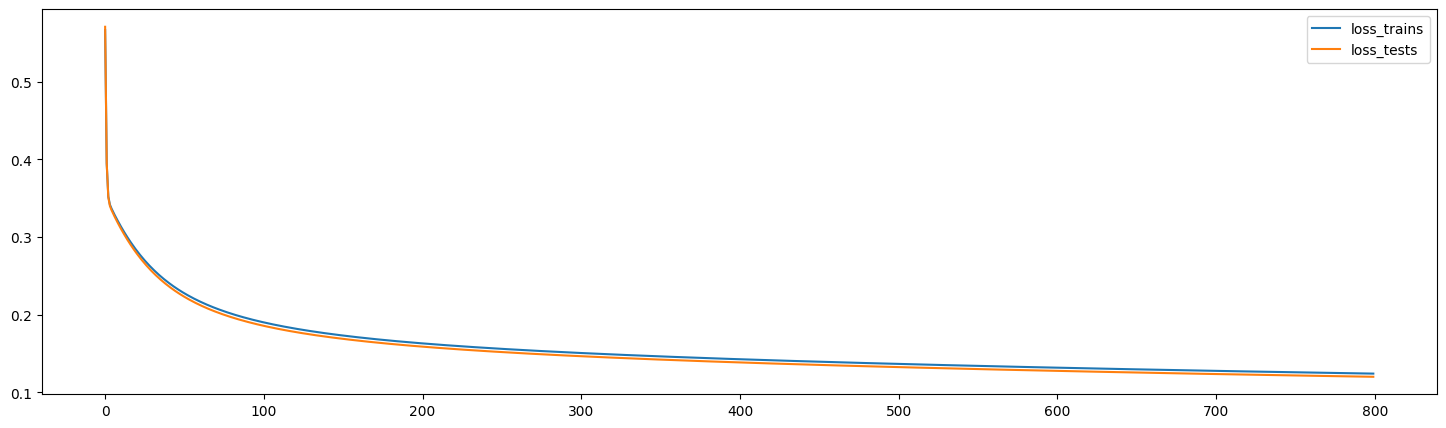

In [6]:
mlr = multi_logistic_regression(xx, y, test_ratio=0.2, learning_rate=0.05, run_times=800)
mlr.run()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch import autograd
import math
import random